In [17]:
import pandas_datareader as pdf
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [22]:
fed_data1 = pdf.get_data_fred(['UNRATE', 'FEDFUNDS', 'INDPRO', 'W823RC1', 'POILBREUSDM', 'CBBTCUSD'])
fed_data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2017-04-26 to 2022-04-24
Freq: D
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UNRATE       59 non-null     float64
 1   FEDFUNDS     59 non-null     float64
 2   INDPRO       59 non-null     float64
 3   W823RC1      58 non-null     float64
 4   POILBREUSDM  55 non-null     float64
 5   CBBTCUSD     1824 non-null   float64
dtypes: float64(6)
memory usage: 99.8 KB


In [3]:
fed_data2 = pdf.get_data_fred(['DCOILBRENTEU'])


In [4]:
covid_data = pd.read_csv('covid.csv', sep = ',')
covid_df = pd.DataFrame(covid_data).set_index('DATE')
covid_df.index = pd.to_datetime(covid_df.index)
covid_df.index.name = 'DATE'


In [21]:
merge_df = [fed_data1, fed_data2, covid_df]
new_df = covid_df.merge(fed_data1, left_index=True, right_index=True).dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2020-02-01 to 2021-11-01
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Confirmed    22 non-null     int64  
 1   UNRATE       22 non-null     float64
 2   FEDFUNDS     22 non-null     float64
 3   INDPRO       22 non-null     float64
 4   W823RC1      22 non-null     float64
 5   POILBREUSDM  22 non-null     float64
 6   CBBTCUSD     22 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.4 KB


In [6]:
reg4 = 'W823RC1~UNRATE+FEDFUNDS+INDPRO+Confirmed+CBBTCUSD+POILBREUSDM'
reg4output=smf.ols(reg4, new_df).fit()
print(reg4output.summary())

                            OLS Regression Results                            
Dep. Variable:                W823RC1   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           4.85e-13
Time:                        18:13:18   Log-Likelihood:                -49.098
No. Observations:                  22   AIC:                             112.2
Df Residuals:                      15   BIC:                             119.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1036.1117     66.901     15.487      

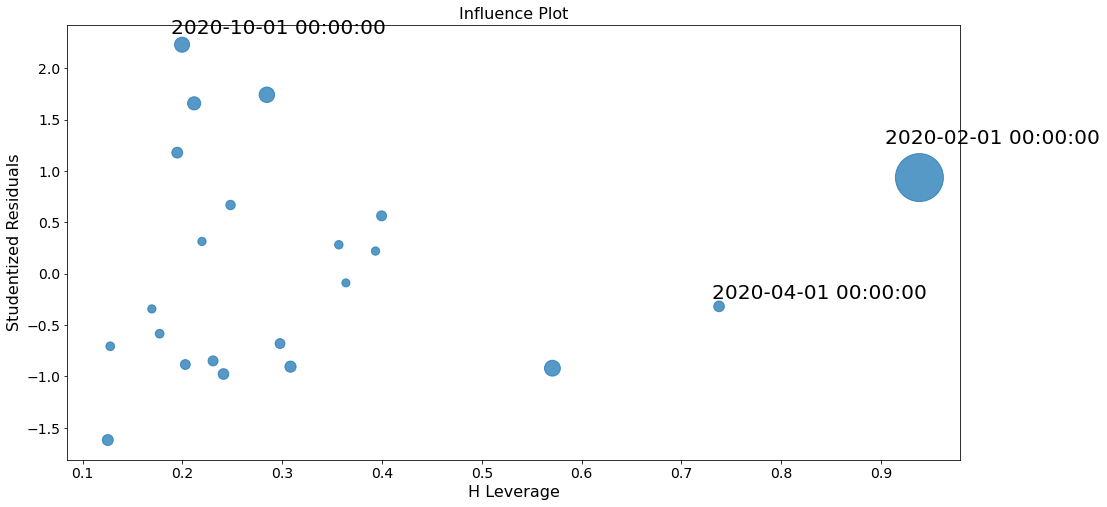

In [7]:
fig = sm.graphics.influence_plot(reg4output, criterion="cooks")

In [10]:
new_df.describe()

,Confirmed,UNRATE,FEDFUNDS,INDPRO,W823RC1,POILBREUSDM,CBBTCUSD
count,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1.897179e+07,7.000000,0.174545,97.203036,1096.627273,55.226550,28043.509545
std,1.620868e+07,2.897289,0.336802,4.740886,19.515834,17.370975,19324.966047
min,8.000000e+00,3.500000,0.050000,84.201800,1066.600000,23.337273,6719.390000
25%,3.170974e+06,5.250000,0.080000,96.018450,1078.800000,41.517460,10308.945000
50%,1.709776e+07,6.100000,0.085000,98.723600,1097.300000,54.777464,24077.220000
75%,3.317304e+07,7.650000,0.090000,100.333450,1112.250000,69.526515,46063.195000
max,4.614922e+07,14.700000,1.580000,102.037400,1129.700000,83.650000,60950.000000


In [23]:
Y = new_df['CBBTCUSD']
X = new_df[['Confirmed',
 'UNRATE',
 'FEDFUNDS',
 'W823RC1',
 'POILBREUSDM',
 'INDPRO']]
X = sm.add_constant(X)

In [24]:
ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CBBTCUSD   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     26.43
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           3.64e-07
Time:                        18:53:07   Log-Likelihood:                -220.89
No. Observations:                  22   AIC:                             455.8
Df Residuals:                      15   BIC:                             463.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.242e+06   5.98e+05      2.075      0.056   -3.35e+04    2.52e+06
Confirmed       0.0033      0.001      3.858      0.002       0.001       0.005
UNRATE       1508.0342   2488.415      0.606      0.554   -3795.897    6811.965
FEDFUNDS     2063.5167   1.06e+04      0.195      0.848   -2.05e+04    2.46e+04
W823RC1     -1265.6275    545.282     -2.321      0.035   -2427.867    -103.387
POILBREUSDM  -746.3005    546.001     -1.367      0.192   -1910.075     417.474
INDPRO       1465.4454   1652.282      0.887      0.389   -2056.311    4987.202
==============================================================================
Omnibus:                        2.179   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.192
Skew:                           0.566   Prob(JB):                        0.551
Kurtosis:                       3.134   Cond. No.                     1.03e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

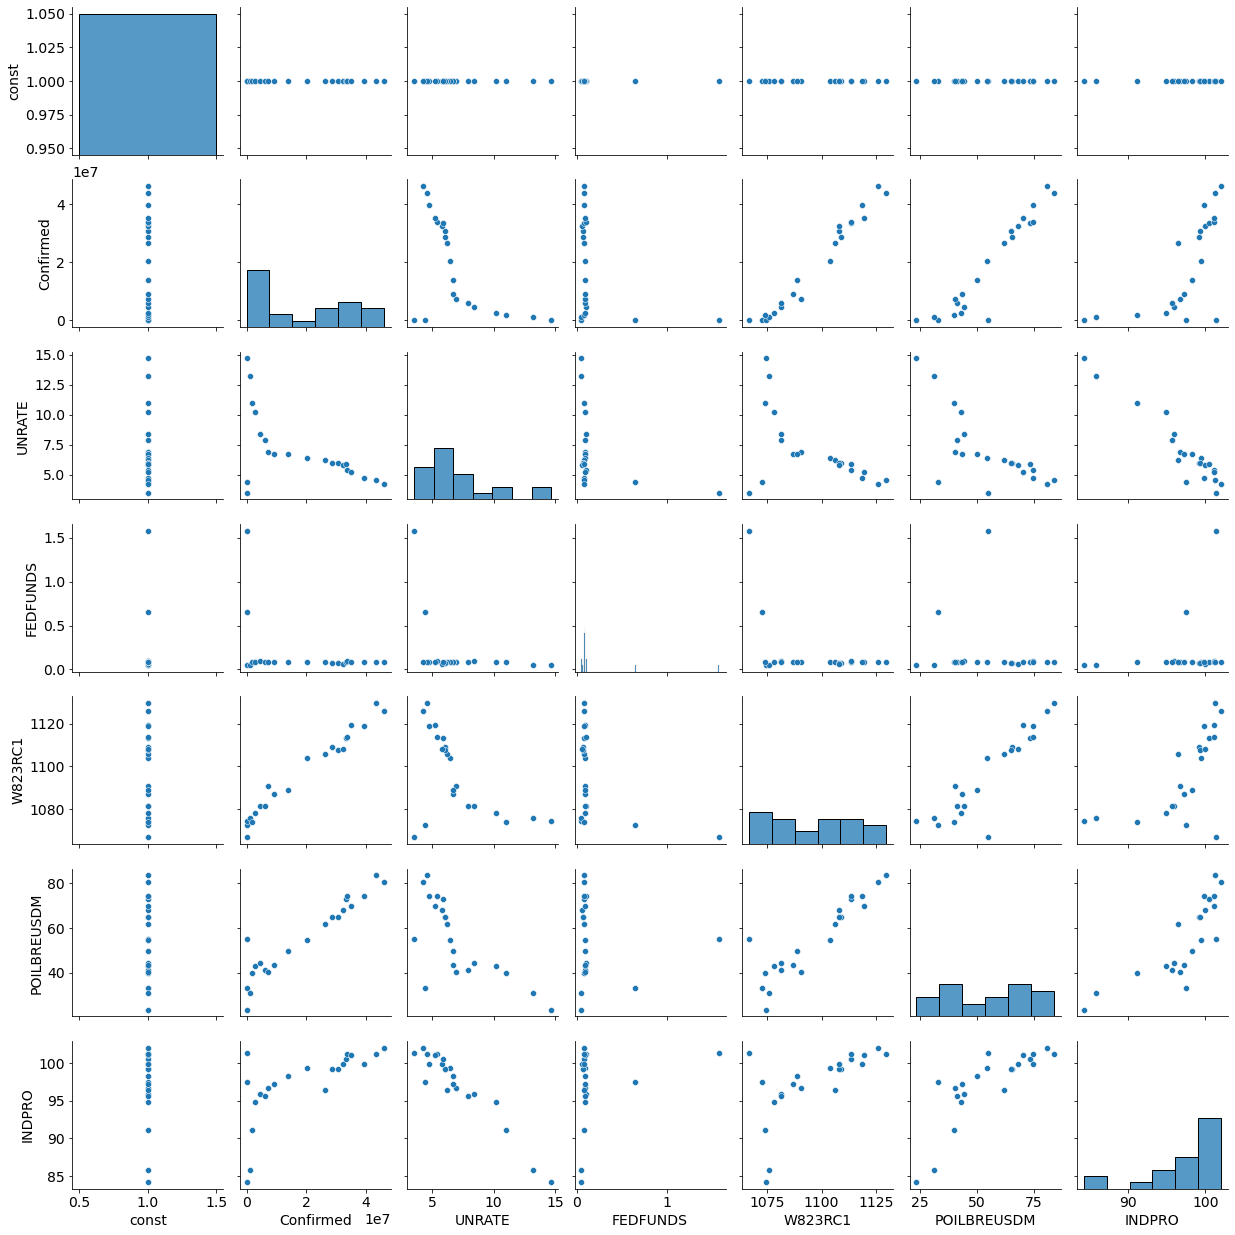

In [25]:
sns.pairplot(X);

C:\Users\Chan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


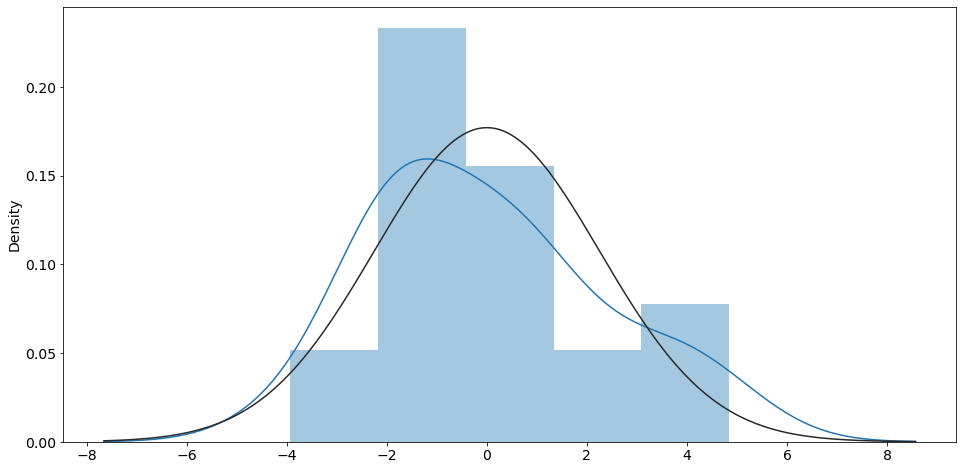

In [26]:
sns.distplot(reg4output.resid, fit=stats.norm);

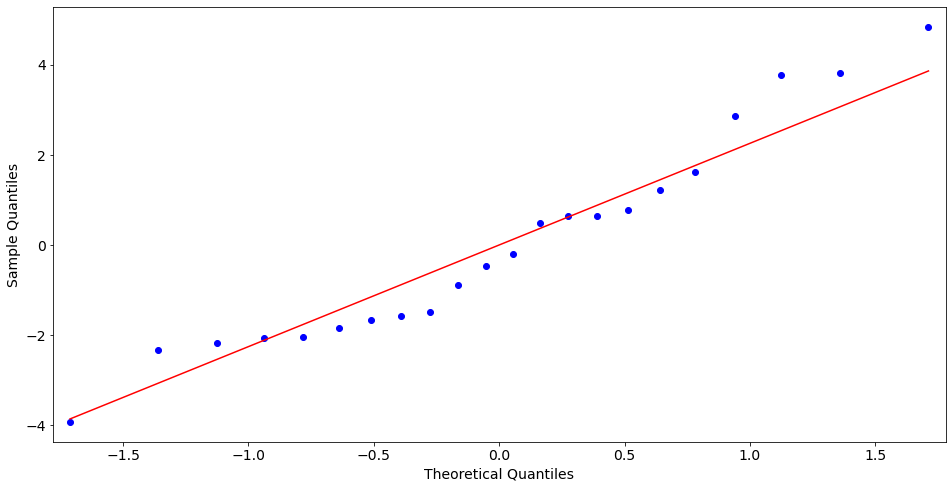

In [19]:
sm.qqplot(reg4output.resid, line='s');